# Solutions to exercises

### <font color="red"> *Exercise 1:* Widgets for interactive data fitting </font>

In [1]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline


# gaussian function
def gauss(x,param):
    [a,b,c] = param
    return a*np.exp(-b*(x-c)**2)

# gaussian array y in interval -5<x-5 
nx = 100
x = np.linspace(-5.,5.,nx)
p = [2.0,0.5,1.5] # some parameters
y = gauss(x,p)

# add some noise
noise = np.random.normal(0,0.2,nx)
y += noise

@interact
def fit(n=(3,30)):
    pfit = np.polyfit(x,y,n)
    yfit = np.polyval(pfit,x)
    plt.plot(x,y,"r",label="Data")
    plt.plot(x,yfit,"b",label="Fit")
    plt.legend()
    plt.ylim(-0.5,2.5)
    plt.show()

interactive(children=(IntSlider(value=16, description='n', max=30, min=3), Output()), _dom_classes=('widget-in…

### <font color="red"> *Exercise 2a:* Cell profiling </font>

First use the `%load` magic

In [2]:
# %load random_walk.py

Split the code over multiple cells (e.g. using `Ctrl-Shift-minus`)

In [3]:
import numpy as np

In [4]:
def step():
    import random
    return 1. if random.random() > .5 else -1.

In [5]:
def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x

Initialize `n` and call `walk()`

In [6]:
n = 100000
x = walk(n)

Plot the random walk

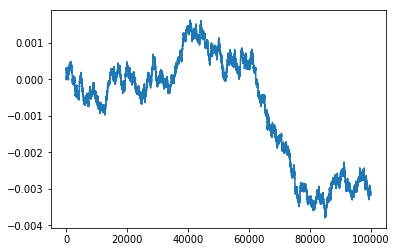

In [7]:
import matplotlib.pyplot as plt
plt.plot(x);

Time the execution using the `%timeit` line magic

In [8]:
t1 = %timeit -o walk(n)

83.9 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Best result

In [9]:
t1.best

0.08231310210030643

Run with the `%%prun` cell profiler

In [10]:
%%prun
walk(n)

         200003 function calls in 0.138 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.081    0.081    0.138    0.138 <ipython-input-5-94fe46e3b455>:1(walk)
    99999    0.047    0.000    0.056    0.000 <ipython-input-4-ff94de0ee2d8>:1(step)
    99999    0.009    0.000    0.009    0.000 {method 'random' of '_random.Random' objects}
        1    0.001    0.001    0.001    0.001 {built-in method numpy.core.multiarray.zeros}
        1    0.000    0.000    0.138    0.138 {built-in method builtins.exec}
        1    0.000    0.000    0.138    0.138 <string>:2(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

### <font color="red"> *Exercise 2b:* Installing a magic command for line profiling </font>



Install the line profiler

In [11]:
#!pip install line_profiler

Load the IPython extension

In [12]:
%load_ext line_profiler

Load the `random_walk.py` example

In [13]:
# %load random_walk.py
import numpy as np

def main():
    n = 100000
    x = walk(n)

def step():
    import random
    return 1. if random.random() > .5 else -1.

def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x

if __name__=="__main__":
    main()


Now run the line profiler.  
Use the line profiler on all the functions:

In [14]:
%lprun -f main -f walk -f step main()

Timer unit: 1e-06 s

Total time: 0.760819 s
File: <ipython-input-13-e9c3eba051c1>
Function: main at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           def main():
     5         1          6.0      6.0      0.0      n = 100000
     6         1     760813.0 760813.0    100.0      x = walk(n)

Total time: 0.133749 s
File: <ipython-input-13-e9c3eba051c1>
Function: step at line 8

Line #      Hits         Time  Per Hit   % Time  Line Contents
     8                                           def step():
     9     99999      68856.0      0.7     51.5      import random
    10     99999      64893.0      0.6     48.5      return 1. if random.random() > .5 else -1.

Total time: 0.568581 s
File: <ipython-input-13-e9c3eba051c1>
Function: walk at line 12

Line #      Hits         Time  Per Hit   % Time  Line Contents
    12                                           def walk(n):
    13         1        973.0    973.0      0.2   

Can you spot the mistake?

### <font color="red"> *Exercise 3:* Data analysis with pandas dataframes </font>

In [15]:
import numpy as np
import pandas as pd
nobel = pd.read_csv("data/nobels.csv")

In [16]:
nobel["share"].describe()

count    967.000000
mean       2.002068
std        0.929166
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: share, dtype: float64

In [17]:
nobel["bornCountryCode"].describe()

count     941
unique     76
top        US
freq      275
Name: bornCountryCode, dtype: object

In [18]:
nobel["born"] = pd.to_datetime(nobel["born"], errors ='coerce')

Add column

In [19]:
nobel["age"] = nobel["year"] - nobel["born"].dt.year

Print surname and age

In [20]:
nobel[["surname","age"]].head(10)

,surname,age
0,Röntgen,56.0
1,Lorentz,49.0
2,Zeeman,37.0
3,Becquerel,51.0
4,Curie,44.0
5,"Curie, née Sklodowska",36.0
6,"Curie, née Sklodowska",44.0
7,(John William Strutt),62.0
8,von Lenard,43.0
9,Thomson,50.0


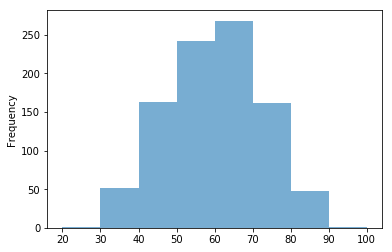

In [21]:
nobel["age"].plot.hist(bins=
                       [20,30,40,50,60,70,
                        80,90,100],alpha=0.6);

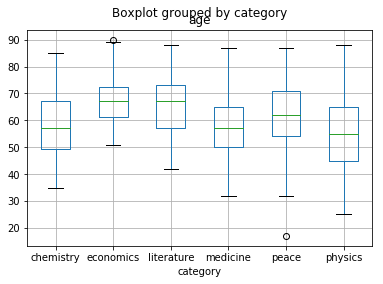

In [22]:
nobel.boxplot(column="age", by="category")

Which Nobel laureates have been Swedish?

In [23]:
nobel.loc[nobel["bornCountry"] == "Sweden"]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,age
16,17,Nils Gustaf,Dalén,1869-11-30,1937-12-09,Sweden,SE,Stenstorp,Sweden,SE,...,male,1912.0,physics,NaN,1.0,"""for his invention of automatic regulators for...",Swedish Gas-Accumulator Co.,Lidingö-Stockholm,Sweden,43.0
28,29,Karl Manne Georg,Siegbahn,1886-12-03,1978-09-26,Sweden,SE,Lund,Sweden,SE,...,male,1924.0,physics,NaN,1.0,"""for his discoveries and research in the field...",Uppsala University,Uppsala,Sweden,38.0
95,91,Hannes Olof Gösta,Alfvén,1908-05-30,1995-04-02,Sweden,SE,Norrköping,Sweden,SE,...,male,1970.0,physics,NaN,2.0,"""for fundamental work and discoveries in magne...",Royal Institute of Technology,Stockholm,Sweden,62.0
124,120,Kai M.,Siegbahn,1918-04-20,2007-07-20,Sweden,SE,Lund,Sweden,SE,...,male,1981.0,physics,NaN,2.0,"""for his contribution to the development of hi...",Uppsala University,Uppsala,Sweden,63.0
168,162,Svante August,Arrhenius,1859-02-19,1927-10-02,Sweden,SE,Vik,Sweden,SE,...,male,1903.0,chemistry,NaN,1.0,"""in recognition of the extraordinary services ...",Stockholm University,Stockholm,Sweden,44.0
187,183,The (Theodor),Svedberg,1884-08-30,1971-02-25,Sweden,SE,Fleräng,Sweden,SE,...,male,1926.0,chemistry,NaN,1.0,"""for his work on disperse systems""",Uppsala University,Uppsala,Sweden,42.0
217,208,Arne Wilhelm Kaurin,Tiselius,1902-08-10,1971-10-29,Sweden,SE,Stockholm,Sweden,SE,...,male,1948.0,chemistry,NaN,1.0,"""for his research on electrophoresis and adsor...",Uppsala University,Uppsala,Sweden,46.0
320,305,Allvar,Gullstrand,1862-06-05,1930-07-28,Sweden,SE,Landskrona,Sweden,SE,...,male,1911.0,medicine,NaN,1.0,"""for his work on the dioptrics of the eye""",Uppsala University,Uppsala,Sweden,49.0
378,359,Axel Hugo Theodor,Theorell,1903-07-06,1982-08-15,Sweden,SE,Linköping,Sweden,SE,...,male,1955.0,medicine,NaN,1.0,"""for his discoveries concerning the nature and...","Karolinska Institutet, Nobel Medical Institute",Stockholm,Sweden,52.0
415,395,Ulf,von Euler,1905-02-07,1983-03-09,Sweden,SE,Stockholm,Sweden,SE,...,male,1970.0,medicine,NaN,3.0,"""for their discoveries concerning the humoral ...",Karolinska Institutet,Stockholm,Sweden,65.0


Finally, try the powerful `groupby()` method.  
Start by adding a column:

In [24]:
nobel["number"] = 1.0

Pick a few countries to analyze further

In [25]:
countries = np.array(["Sweden", "United Kingdom", "France", "Denmark"])
nobel2 = nobel.loc[nobel['bornCountry'].isin(countries)]

Add extra column with number of Nobel prizes per row (needed for statistics)

In [26]:
table = nobel2.pivot_table(values="number", index="bornCountry", 
                           columns="category", aggfunc=np.sum)
table

category,chemistry,economics,literature,medicine,peace,physics
bornCountry,,,,,,
Denmark,1.0,NaN,4.0,3.0,1.0,2.0
France,10.0,3.0,11.0,12.0,9.0,8.0
Sweden,4.0,2.0,7.0,7.0,5.0,4.0
United Kingdom,22.0,7.0,6.0,26.0,5.0,22.0


Finally, heatmap visualization

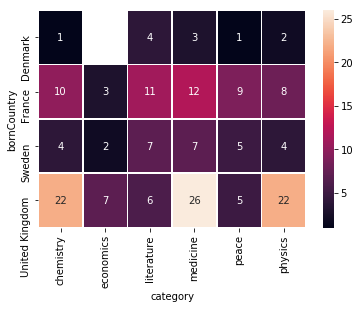

In [27]:
import seaborn as sns
sns.heatmap(table,linewidths=.5, annot=True);

### <font color="red"> *Exercise 4:* Defining your own custom magic command </font>


In [28]:
from IPython.core.magic import register_cell_magic

In [29]:
def cpp(line, cell):
    """Compile, execute C++ code, and return the standard output."""

    # We first retrieve the current IPython interpreter instance.
    ip = get_ipython()
    # We define the source and executable filenames.
    source_filename = '_temp.cpp'
    program_filename = '_temp'
    # We write the code to the C++ file.
    with open(source_filename, 'w') as f:
        f.write(cell)
    # We compile the C++ code into an executable.
    compile = ip.getoutput("g++ {0:s} -o {1:s}".format(
        source_filename, program_filename))
    # We execute the executable and return the output.
    output = ip.getoutput('./{0:s}'.format(program_filename))
    print('\n'.join(output))

def load_ipython_extension(ipython):
    ipython.register_magic_function(cpp,'cell')

In [30]:
%load_ext cpp_ext

In [31]:
# get help on the cpp magic:
%cpp?

Object `%cpp` not found.


Hello World program in C++

In [32]:
%%cpp
#include <iostream>
using namespace std;

int main() 
{
    cout << "Hello, World!";
    return 0;
}

Hello, World!


### <font color="red"> *Exercise 5:* Parallel Python with ipyparallel </font>

Import module, create client and DirectView object:

In [34]:
import ipyparallel as ipp
client = ipp.Client()
dview = client[:]

Import modules, export `random` module to engines:

In [35]:
from random import random
from math import pi
dview['random'] = random

In [36]:
def mcpi(nsamples):
    s = 0
    for i in range(nsamples):
        x = random()
        y = random()
        if x*x + y*y <= 1:
            s+=1
    return 4.*s/nsamples

In [37]:
%%timeit -n 1
mcpi(int(1e7))

3.05 s ± 97.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Function for splitting up the samples and dispatching the chunks to the engines

In [38]:
def multi_mcpi(view, nsamples):
    p = len(view.targets)
    if nsamples % p:
        # ensure even divisibility
        nsamples += p - (nsamples%p)
    
    subsamples = nsamples//p
    
    ar = view.apply(mcpi, subsamples)
    return sum(ar)/p

In [39]:
%%timeit -n 1
multi_mcpi(dview, int(1e7))

1.71 s ± 30.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### <font color="red"> *Exercise 6:* Mixing Python and R </font>

In [40]:
import pandas as pd
df = pd.DataFrame({
 'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

In [41]:
%load_ext rpy2.ipython

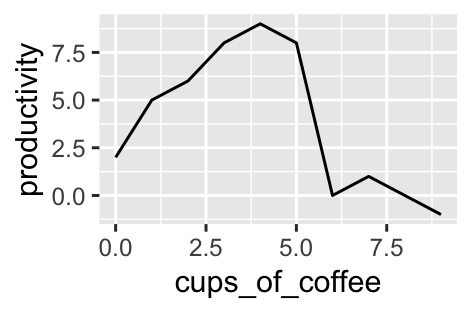

In [43]:
%%R -i df -w 6 -h 4 --units cm -r 200
# the first line says 'import df and make default figure size 5 by 5 inches 
# with resolution 200. You can change the units to px, cm, etc. as you wish.
library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line();